### Imports and Configurations

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [2]:
# Load the dataset into a Pandas dataframe called Credit Card Customer Data.

dfCredit = pd.read_excel('Credit Card Customer Data.xlsx')

#Check the head of the dataset
dfCredit.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


#### Data pre-processing - Understand the data and treat missing values, outliers

In [3]:
# Get the shape and size of the dataset

dfCredit.shape

(660, 7)

In [4]:
# Get more info on it
# 1. Name of the columns
# 2. Find the data types of each columns
# 3. Look for any null/missing values

dfCredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


#### Observations

* The dataset comprises of 660 **rows** and 07 **columns**.
* All the input features are numerics of type integer or float. Only the class/target feature is of type object, as it is categorical in nature.
* There are **NO** null/missing values present in the dataset

In [5]:
# Drop the 'Sl_No'

dfCredit.drop(columns=['Sl_No'],axis=1, inplace=True)

In [6]:
# Describe the dataset with various other summary and statistics

dfCredit[['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']].describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [7]:
# Check the dataset after NULL treatment

dfCredit.isnull().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

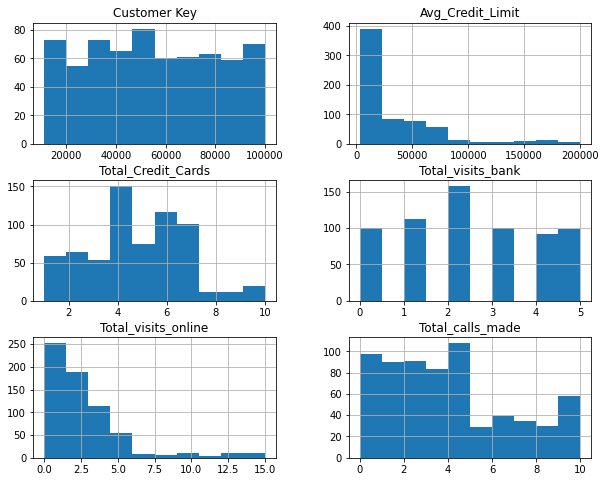

In [8]:
# Look at the individual distribution histogram

dfCredit.hist(figsize=(10,8))
plt.show()

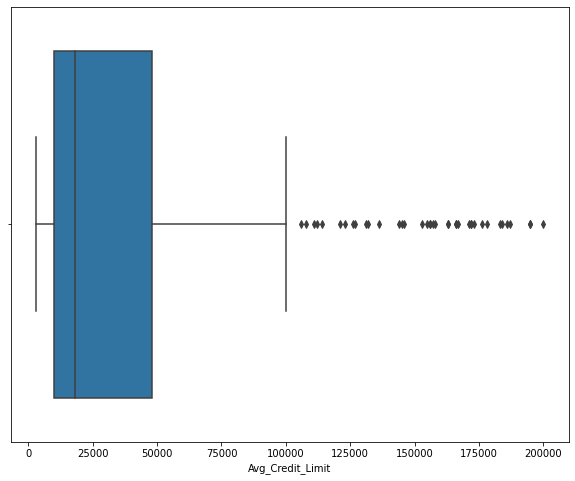

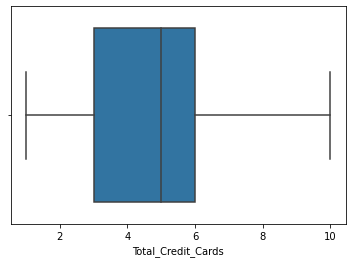

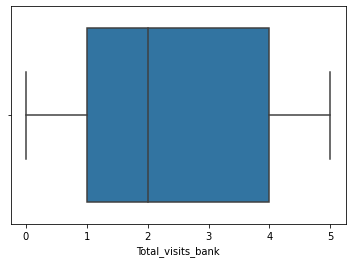

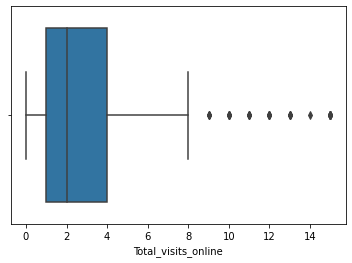

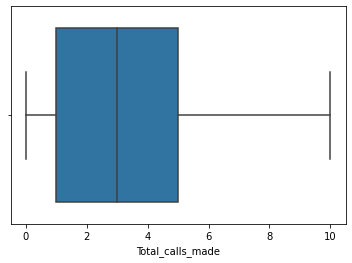

In [9]:
# Look at the individual Outlier boxPlot

plt.figure(figsize=(10,8))

for i in ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']:
    sns.boxplot(dfCredit[i])
    plt.show()


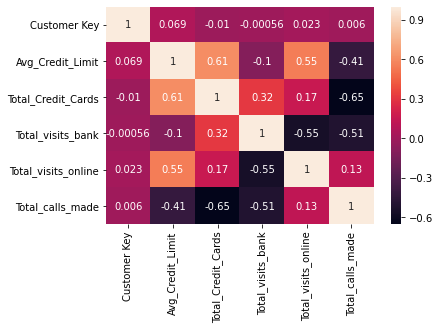

In [10]:
# Visualize the correlation among independent features

sns.heatmap(dfCredit.corr(),annot=True)
plt.show()

In [11]:
from scipy.stats import zscore

# apply zscore value to the dataset

dfCreditScaled=dfCredit.apply(zscore)
dfCreditScaled.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739


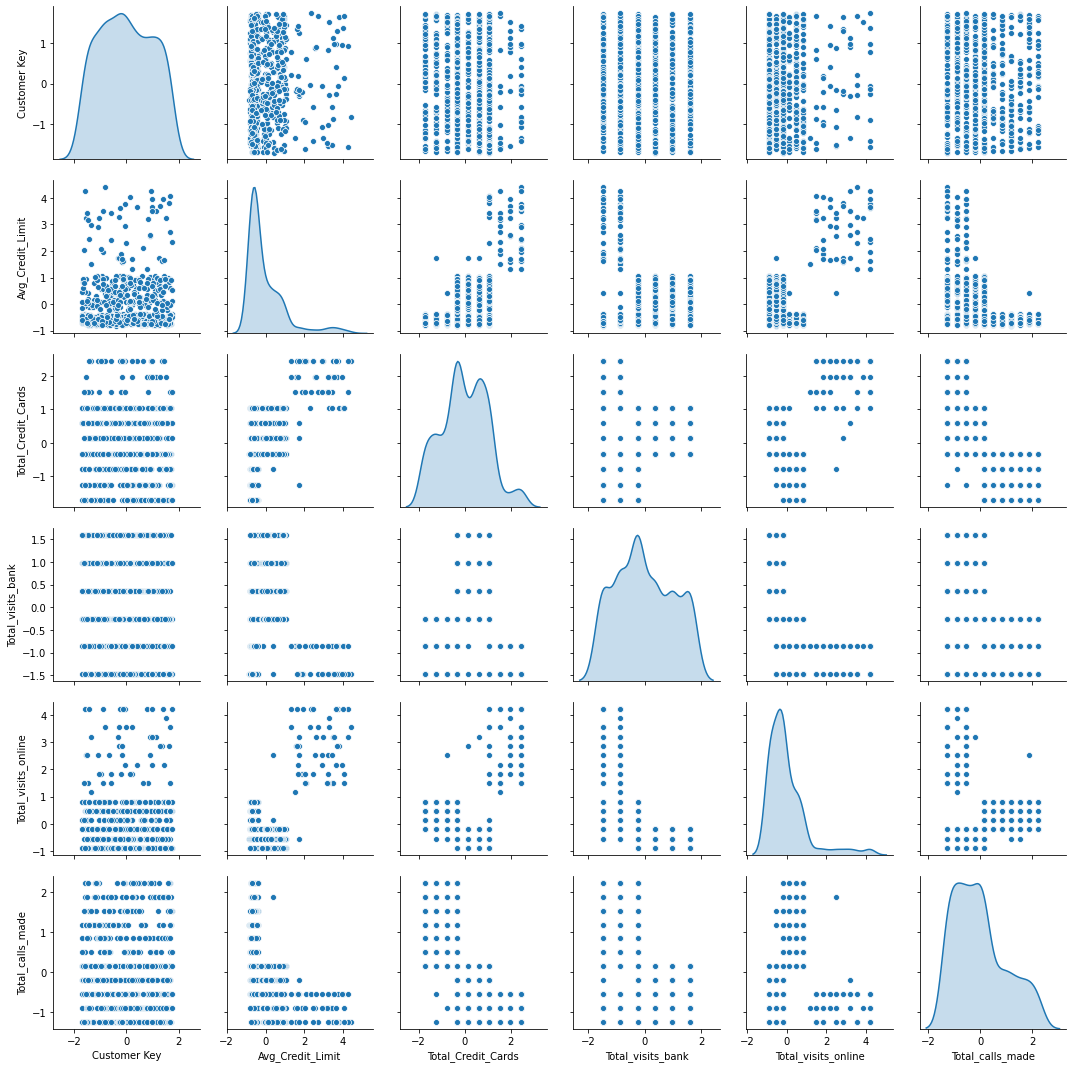

In [12]:
# Visualize the pairplot to the dataset

sns.pairplot(dfCreditScaled,diag_kind='kde')
plt.show()

#### K-Mean Cluster

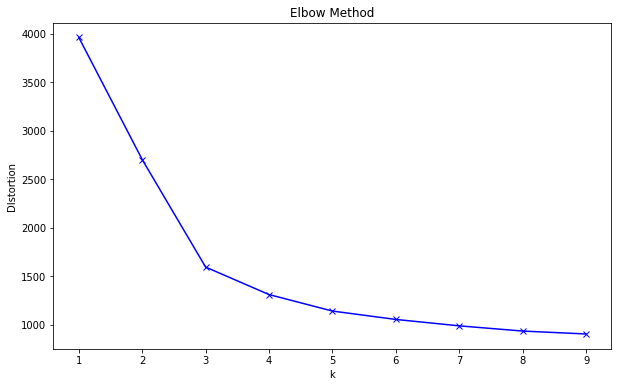

In [13]:
# Now we are going to implement Elbow method to final optimal number of clusters

from sklearn.cluster import KMeans

distortions=[]
clusters = range(1,10)

for k in clusters:
    kmeanModel=KMeans(n_clusters=k)
    kmeanModel.fit(dfCreditScaled)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(clusters, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('DIstortion')
plt.title('Elbow Method')
plt.show()

* We can see from above plot that the optimal number of clusters in this case are 3.
* So lets apply kmeans method.

In [14]:
kmeans = KMeans(n_clusters=3, random_state=34)
kmeans.fit(dfCreditScaled)
centroids=kmeans.cluster_centers_

In [15]:
# Centorids of the clusters

centroids

array([[-0.01015743, -0.02106178,  0.37368962,  0.6663945 , -0.55367163,
        -0.55300488],
       [ 0.00384197, -0.59579625, -1.05962278, -0.9015185 ,  0.32299678,
         1.14810882],
       [ 0.06120332,  2.83176409,  1.86222621, -1.10576269,  2.82731942,
        -0.87432983]])

In [16]:
# Lets create a dataframe of cluster centers

centroids_df = pd.DataFrame(centroids, columns=list(dfCreditScaled))

In [17]:
# For each cluster, its the average of each column
centroids_df

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.010157,-0.021062,0.373690,0.666395,-0.553672,-0.553005
1,0.003842,-0.595796,-1.059623,-0.901518,0.322997,1.148109
2,0.061203,2.831764,1.862226,-1.105763,2.827319,-0.874330


In [18]:
kmean_label=kmeans.labels_

In [19]:
kmean_label

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
# Lenght of the labels

len(kmeans.labels_)

660

In [21]:
dfCreditScaled.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [22]:
pd.DataFrame(kmeans.labels_, columns=list(['labels']))

,labels
0,0
1,1
2,0
3,0
4,2
...,...
655,2
656,2
657,2
658,2


In [23]:
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['labels']))

In [24]:
# Let join the cluster labels and plot the bar plot below

df_labled = df_labels.join(dfCreditScaled)

In [25]:
df_labled

,labels,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,1,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,0,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,2,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...,...,...
655,2,-0.157505,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,2,0.218310,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2,-0.051055,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,2,0.996298,3.655235,2.443892,-0.860451,4.224968,-1.251537


In [26]:
df_labled.groupby('labels').mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,,
0,-0.010157,-0.021062,0.373690,0.666395,-0.553672,-0.553005
1,0.003842,-0.595796,-1.059623,-0.901518,0.322997,1.148109
2,0.061203,2.831764,1.862226,-1.105763,2.827319,-0.874330


In [27]:
centroids_df

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.010157,-0.021062,0.373690,0.666395,-0.553672,-0.553005
1,0.003842,-0.595796,-1.059623,-0.901518,0.322997,1.148109
2,0.061203,2.831764,1.862226,-1.105763,2.827319,-0.874330


In [28]:
df_labled['labels'].value_counts()

0    386
1    224
2     50
Name: labels, dtype: int64

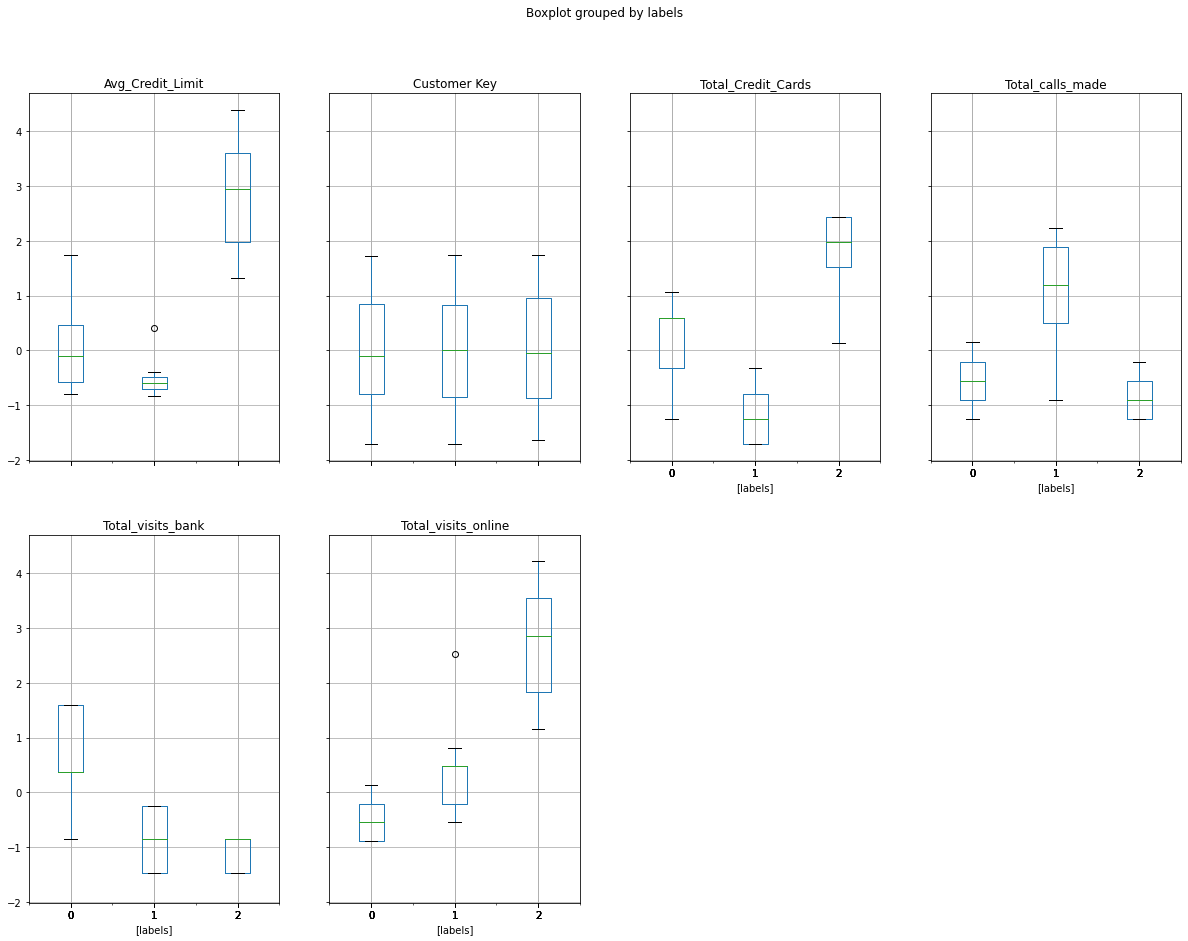

In [29]:
# Plot the boxplot for each cluster.

df_labled.boxplot(by='labels', layout=(2,4), figsize=(20,15))
plt.show()

In [30]:
df_labled.head()

,labels,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,1,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,0,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,2,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739


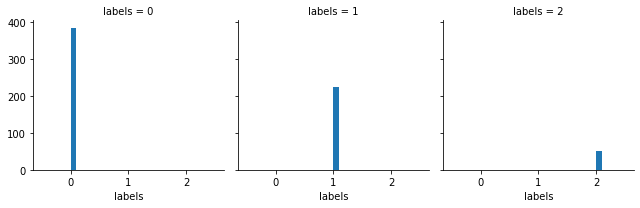

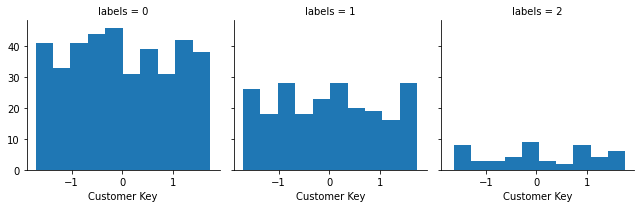

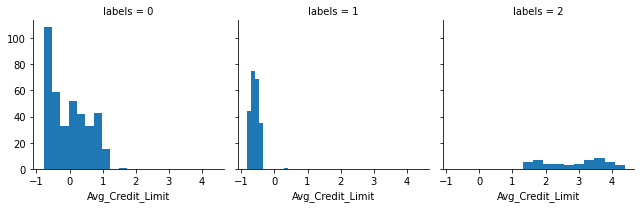

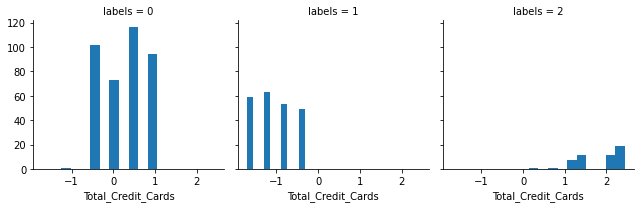

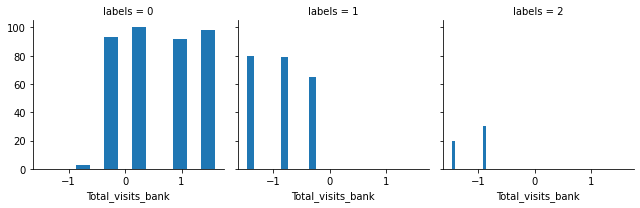

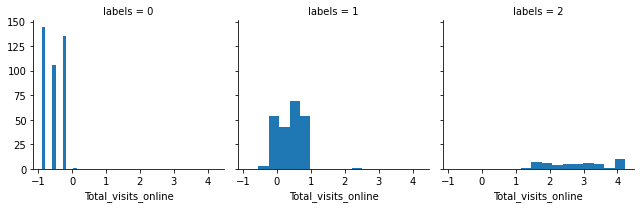

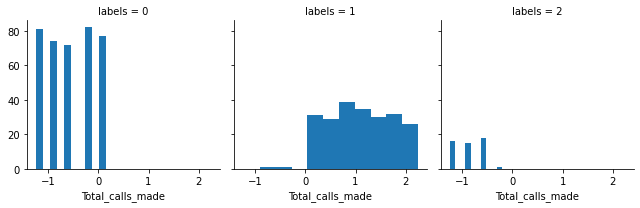

In [31]:
# Plot the FaceGrid for each clusters

for c in df_labled:
    grid=sns.FacetGrid(df_labled, col='labels')
    grid.map(plt.hist, c)

#### Silhouette Score - KMean Cluster

In [32]:
import sklearn.metrics as metrics
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.33817196365464486
For n_clusters = 3 The average silhouette_score is : 0.4177434852377372
For n_clusters = 4 The average silhouette_score is : 0.3228907072652812
For n_clusters = 5 The average silhouette_score is : 0.2850863954249504
For n_clusters = 6 The average silhouette_score is : 0.25411923510972967
For n_clusters = 7 The average silhouette_score is : 0.23806854852048398
For n_clusters = 8 The average silhouette_score is : 0.2273785427550005


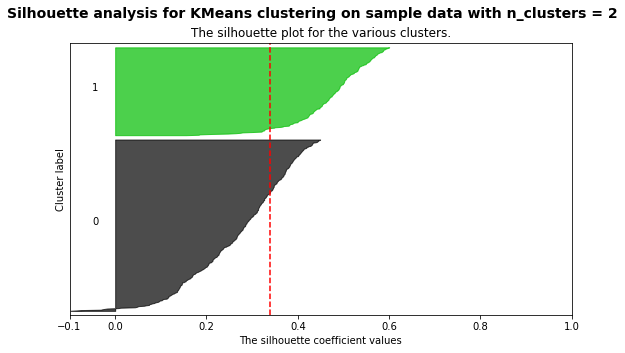

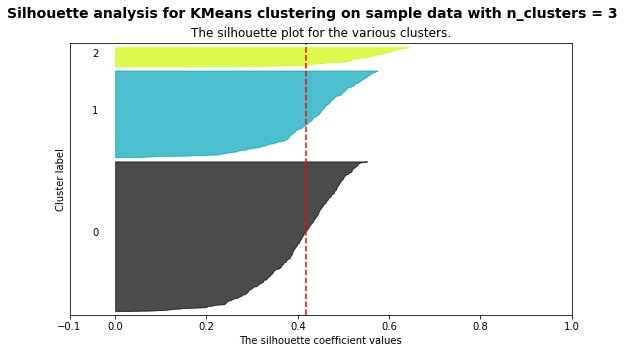

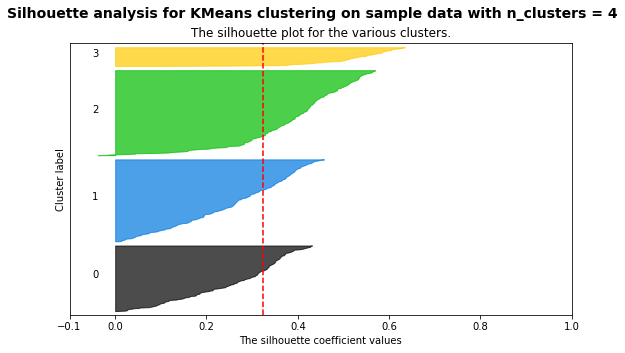

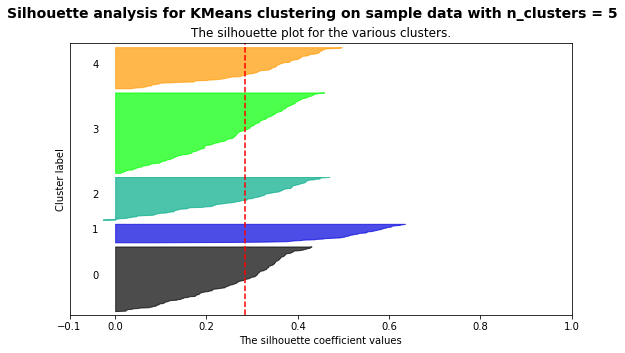

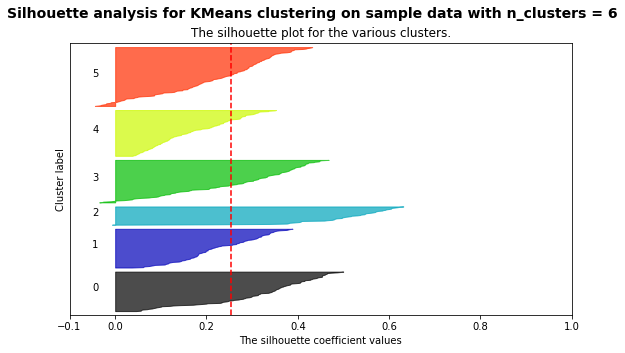

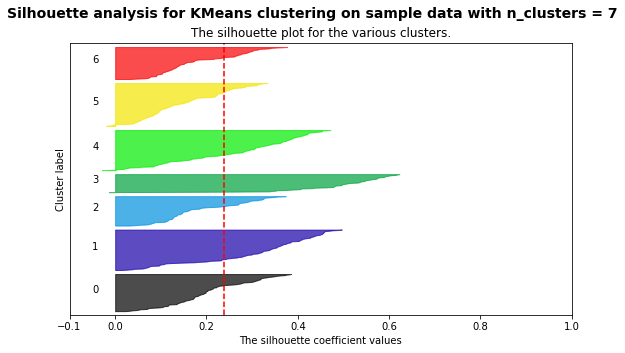

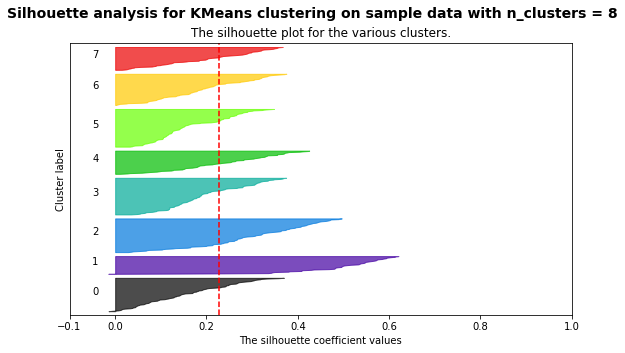

In [33]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(9,5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1,1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dfCreditScaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dfCreditScaled)
    
    silhouette_avg = silhouette_score(dfCreditScaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfCreditScaled, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color =cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(dfCreditScaled[:, 0], dfCreditScaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
     #            c=colors, edgecolor='k')

    # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')

plt.show()

##### Observations

* above Silhouette score for each clusters.
* best Silhouette score for **cluster=3 and score is 0.4177434852377372**.
* visualization the cluster in detail to identify the best silhouette score.

##### PCA

* Lets convert our data to only 2D using PCA.

In [34]:
covMatrix = np.cov(df_labled,rowvar=False)
print(covMatrix)

[[ 4.02041661e-01  1.05932209e-02  2.27189757e-01 -7.75916264e-02
  -4.74228242e-01  5.38821278e-01  2.57577229e-01]
 [ 1.05932209e-02  1.00151745e+00  6.87085076e-02 -1.02961020e-02
  -5.60374991e-04  2.25403765e-02  5.97740222e-03]
 [ 2.27189757e-01  6.87085076e-02  1.00151745e+00  6.09784409e-01
  -1.00464529e-01  5.52221223e-01 -4.14980652e-01]
 [-7.75916264e-02 -1.02961020e-02  6.09784409e-01  1.00151745e+00
   3.16275257e-01  1.68012865e-01 -6.52239740e-01]
 [-4.74228242e-01 -5.60374991e-04 -1.00464529e-01  3.16275257e-01
   1.00151745e+00 -5.52698824e-01 -5.06783706e-01]
 [ 5.38821278e-01  2.25403765e-02  5.52221223e-01  1.68012865e-01
  -5.52698824e-01  1.00151745e+00  1.27492554e-01]
 [ 2.57577229e-01  5.97740222e-03 -4.14980652e-01 -6.52239740e-01
  -5.06783706e-01  1.27492554e-01  1.00151745e+00]]


In [35]:
pca = PCA(n_components=6)
pca.fit(df_labled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

##### The Eigen Values

In [36]:
print(pca.explained_variance_)

[2.33014053 2.18443136 1.0029376  0.32228395 0.28003586 0.24560369]


#### The Eigen Vectors

In [37]:
print(pca.components_)

[[ 0.23197074 -0.00262565 -0.27484046 -0.5194952  -0.47938016  0.16965554
   0.58496308]
 [ 0.32512035  0.04395612  0.55503296  0.29522436 -0.3520171   0.60687167
  -0.07025913]
 [ 0.01961173 -0.9965402  -0.02659019  0.05164219 -0.03710583  0.03702793
  -0.02002843]
 [-0.07750951  0.00967962  0.02957332 -0.25970892 -0.65468438 -0.31277635
  -0.63177099]
 [-0.11037926  0.03733283 -0.18675884  0.72442688 -0.44273897 -0.34306303
   0.33621344]
 [ 0.11067055  0.05881425 -0.75947185  0.2087469  -0.00958755  0.48194681
  -0.3627058 ]]


And the percentage of variation explained by each eigen Vector

In [38]:
print(pca.explained_variance_ratio_)

[0.36345146 0.34072399 0.15643655 0.05026932 0.04367953 0.03830886]


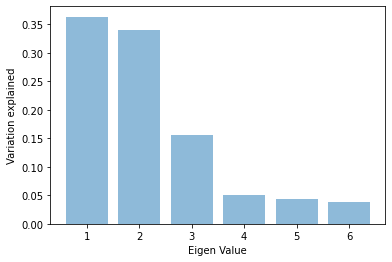

In [39]:
# Plot the bar chart to check the Eigen Value.

plt.bar(list(range(1,7)), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.show()

##### Observations

* see the above plt and its very big drop on eigen value on **3**.
* we will choose 3 is the best value for PCA.

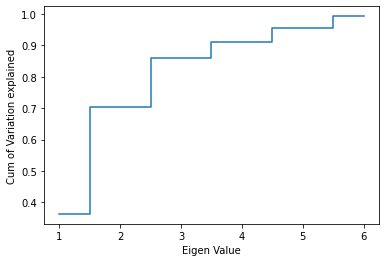

In [40]:
plt.step(list(range(1,7)), np.cumsum(pca.explained_variance_ratio_),where='mid')
plt.ylabel('Cum of Variation explained')
plt.xlabel('Eigen Value')
plt.show()

#### Dimensionality Reduction

Now 3 dimensions seems very reasonable. With 3 variables we can explain over 95% of the variation in the original data!

In [41]:
pca3 = PCA(n_components=3)
pca3.fit(df_labled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(df_labled)

[[ 0.23197074 -0.00262565 -0.27484046 -0.5194952  -0.47938016  0.16965554
   0.58496308]
 [ 0.32512035  0.04395612  0.55503296  0.29522436 -0.3520171   0.60687167
  -0.07025913]
 [ 0.01961173 -0.9965402  -0.02659019  0.05164219 -0.03710583  0.03702793
  -0.02002843]]
[0.36345146 0.34072399 0.15643655]


In [42]:
# create a dataframe of these 3 componenets

Xpca3_df=pd.DataFrame(data=Xpca3, columns=['pca1','pca2','pca3'])
Xpca3_df

,pca1,pca2,pca3
0,-0.358963,0.550834,-1.326296
1,2.656956,2.047505,0.719467
2,-0.252503,0.690038,1.539127
3,0.255298,-0.251798,0.579278
4,0.692854,4.096097,0.491326
...,...,...,...
655,-1.282076,4.076764,0.417523
656,-0.591292,4.443394,0.077494
657,-0.992510,4.256538,0.211611
658,-1.529579,6.239540,-0.720805


In [43]:
Xpca3.shape

(660, 3)

In [44]:
x,y = Xpca3[:,0], Xpca3[:,1]

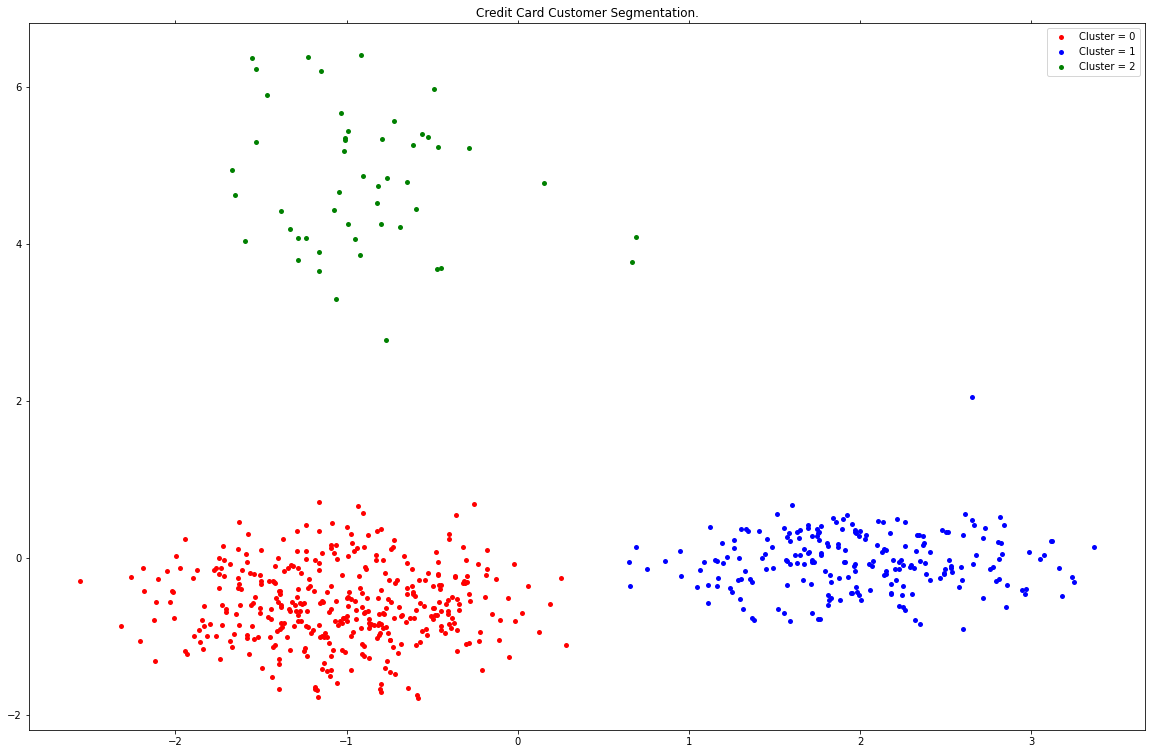

In [45]:
colors = {0: 'red',
          1: 'blue',
          2: 'green'}

names = {0: 'Cluster = 0', 
         1: 'Cluster = 1', 
         2: 'Cluster = 2'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':kmean_label}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Credit Card Customer Segmentation.")
plt.show()

In [46]:
df.head()

,x,y,label
0,-0.358963,0.550834,0
1,2.656956,2.047505,1
2,-0.252503,0.690038,0
3,0.255298,-0.251798,0
4,0.692854,4.096097,2


In [47]:
groups.head()

,x,y,label
0,-0.358963,0.550834,0
1,2.656956,2.047505,1
2,-0.252503,0.690038,0
3,0.255298,-0.251798,0
4,0.692854,4.096097,2
5,2.149375,-0.198018,1
6,0.670437,3.779074,2
7,0.757951,-0.136546,1
8,1.328388,-0.160686,1
9,1.830942,-0.311954,1


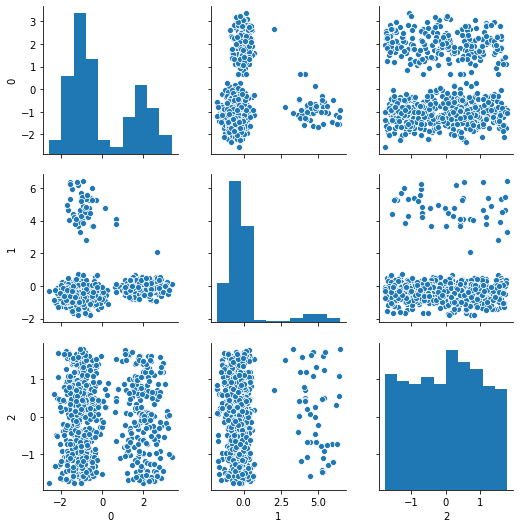

In [48]:
sns.pairplot(pd.DataFrame(Xpca3))
plt.show()

#### Conclusion for KMean Cluster

* Cluster 0 : Most of the Customers (386) out of (660) are using more the total - credit card & visitng the bank.
* Cluster 1 : Reamining customers  (224) out of (660) are using more - total calls are made and less customers are using visit online services.
* Cluster 2 : Remaining Customers (50) out of (660) are using total - credit cards and visits online service.

### Hierarchical Clustering

##### FInd out the linkage matrix

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from sklearn.cluster import AgglomerativeClustering 
from scipy.spatial.distance import pdist

In [50]:
siliuette_list_hierarchical = []

clusterH = 3
for linkage_method in ['ward', 'average', 'complete', 'single']:
    
    agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',
                                                n_clusters=clusterH).fit_predict(dfCreditScaled)
    sil_score = metrics.silhouette_score(dfCreditScaled, agglomerative, metric='euclidean')
    siliuette_list_hierarchical.append((clusterH, sil_score, linkage_method, len(set(agglomerative)) ) )

    df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])
        

In [51]:
df_hierarchical.sort_values('sil_score',ascending=False)

,cluster,sil_score,linkage_method,number_of_clusters
1,3,0.417872,average,3
0,3,0.417825,ward,3
2,3,0.417825,complete,3
3,3,0.310772,single,3


##### Observations

* finding out the best linkage method to use and euclidean method, getting best siliuette sore.
* from siliuette score to get best linkage method and that is  - **average**.

In [52]:
#  fit the model
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model.fit(dfCreditScaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3, pooling_func='deprecated')

In [53]:
# adding a labels in dataframe

pd.DataFrame(model.labels_, columns = list(['labels_Hier']))

,labels_Hier
0,0
1,2
2,0
3,0
4,1
...,...
655,1
656,1
657,1
658,1


In [54]:
hiera_labels=model.labels_
hiera_labels

array([0, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [55]:
df_labelsH = pd.DataFrame(model.labels_, columns = list(['labels_Hier']))

In [56]:
# Join the label into the dataframe.

df_labeledHier = df_labelsH.join(dfCreditScaled)

In [57]:
df_labeledHier

,labels_Hier,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,2,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,0,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...,...,...
655,1,-0.157505,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1,0.218310,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,1,-0.051055,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,1,0.996298,3.655235,2.443892,-0.860451,4.224968,-1.251537


In [58]:
# Group by label and use the mean methond.

df_labeledHier.groupby('labels_Hier').mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels_Hier,,,,,,
0,-0.010412,-0.022284,0.371882,0.664034,-0.551894,-0.551200
1,0.061203,2.831764,1.862226,-1.105763,2.827319,-0.874330
2,0.004346,-0.596253,-1.062913,-0.904453,0.323843,1.152605


In [59]:
# Count the labels

df_labeledHier['labels_Hier'].value_counts()

0    387
2    223
1     50
Name: labels_Hier, dtype: int64

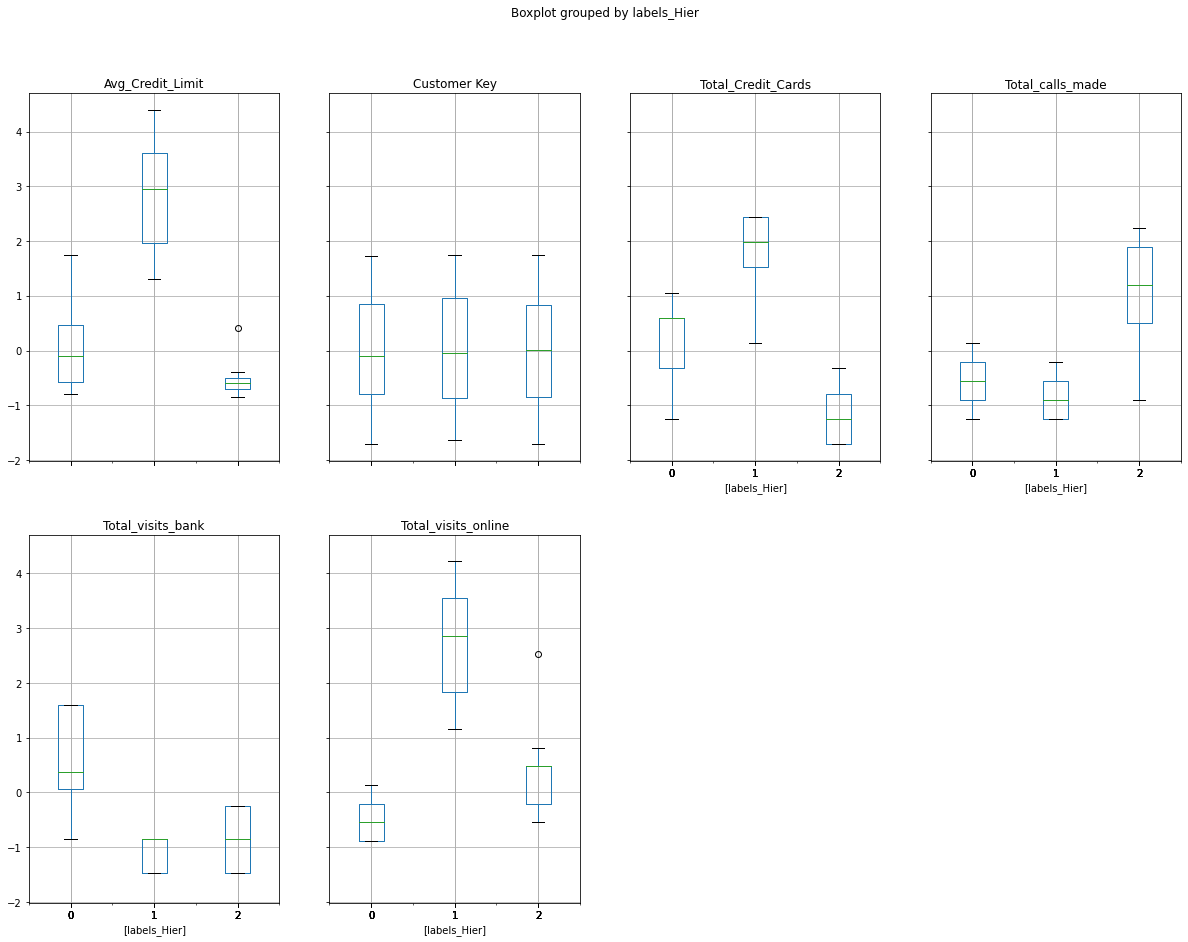

In [60]:
# plot the boxplot and label layout

df_labeledHier.boxplot(by='labels_Hier',layout=(2,4), figsize=(20,15))
plt.show()

In [61]:
df_labeledHier.head()

,labels_Hier,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,2,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,0,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739


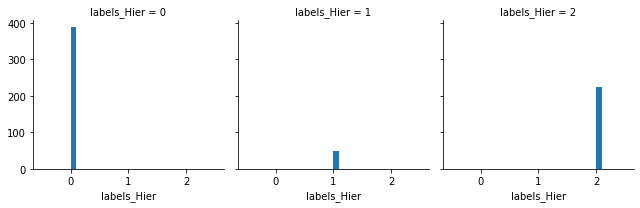

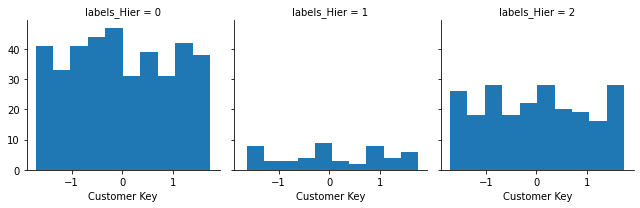

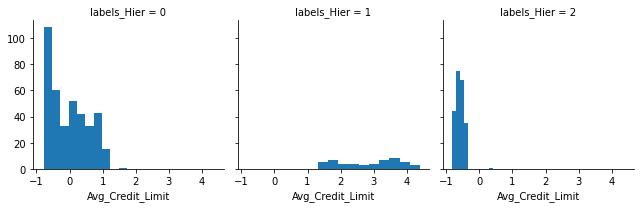

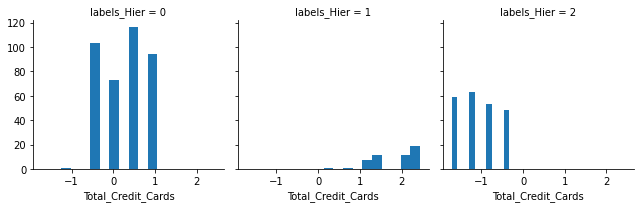

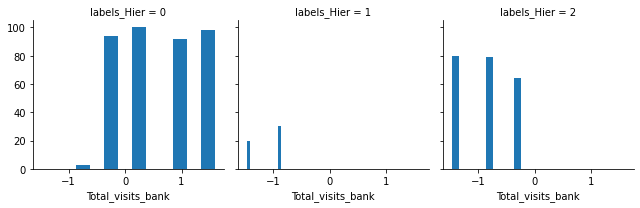

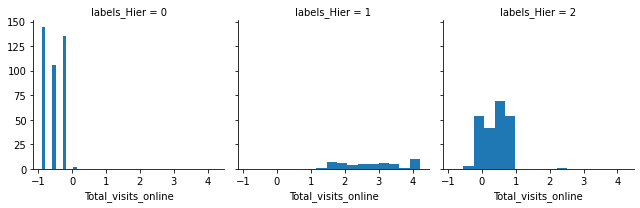

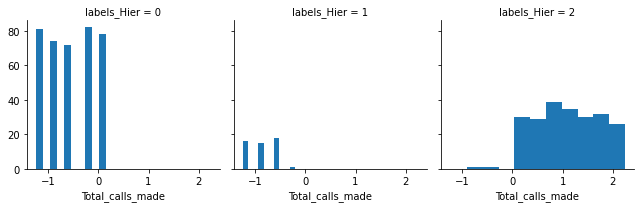

In [62]:
# Plot the FaceGrid for each clusters

for c in df_labeledHier:
    grid=sns.FacetGrid(df_labeledHier, col='labels_Hier')
    grid.map(plt.hist, c)

In [63]:
# Define a fuction for Linkage method and find out the C values and plot the dendrogram

def hierClus():
    
    for linkages in ['ward', 'average', 'complete', 'single']:
        
        Z = linkage(dfCreditScaled, metric='euclidean', method=linkages)
        c, coph_dists = cophenet(Z, pdist(dfCreditScaled))
        print ('C Values for',linkages,'=',c)
        
        print("Plot the dendrogram for the consolidated dataframe")
        plt.figure(figsize=(25,10))
        plt.title('Hierarchical Clusting Dentogram')
        plt.xlabel('Sample Index')
        plt.ylabel('Distance')
        dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
        plt.show()
        
        print("From the truncated dendrogram, find out the optimal distance between clusters")
        dendrogram(Z, truncate_mode='lastp', p=3)
        plt.show()
        print("\n")
        
        print("Linkages",linkages)
    
        plt.figure(figsize=(18, 16))
        plt.title('Agglomerative Hierarchical Clustering Dendogram')
        plt.xlabel('sample index')
        plt.ylabel('Distance')
        Z = linkage(dfCreditScaled, method=linkages)
        dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
        plt.show()
        
        print("------------------------------------------------------------")
        print("\n")

C Values for ward = 0.7067190998109724
Plot the dendrogram for the consolidated dataframe


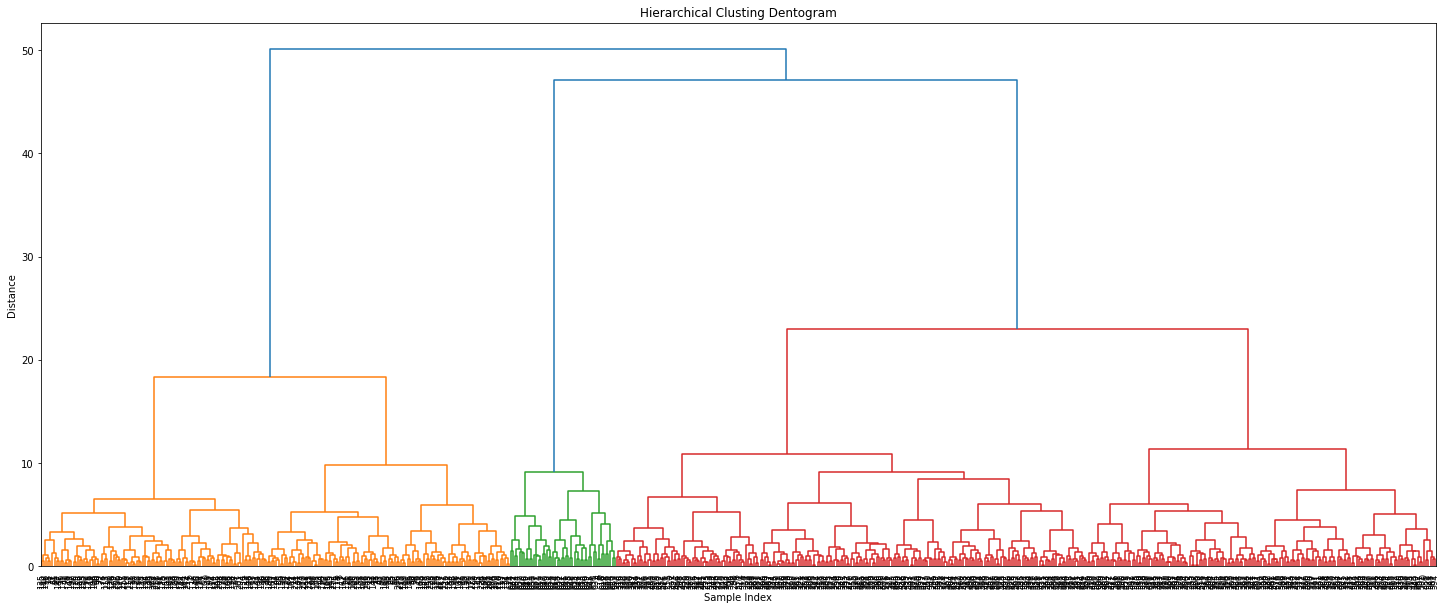

From the truncated dendrogram, find out the optimal distance between clusters


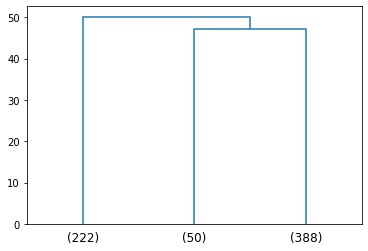



Linkages ward


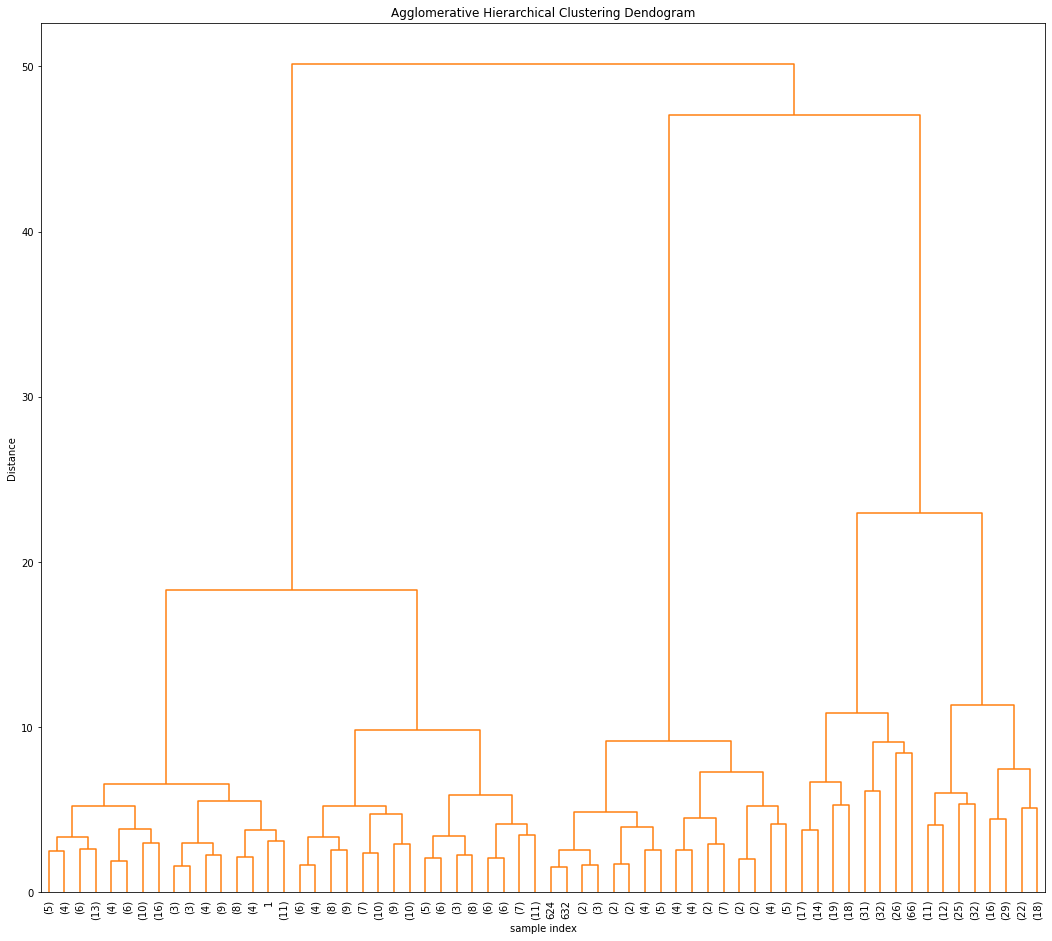

------------------------------------------------------------


C Values for average = 0.8684228720933057
Plot the dendrogram for the consolidated dataframe


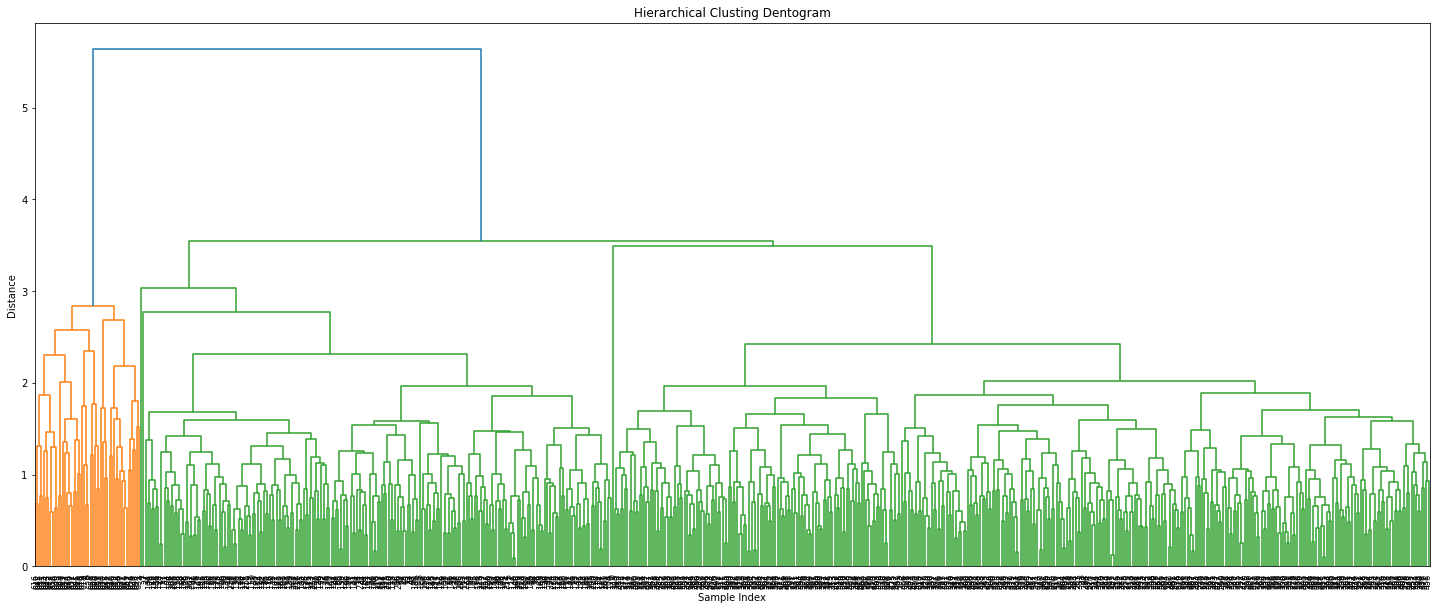

From the truncated dendrogram, find out the optimal distance between clusters


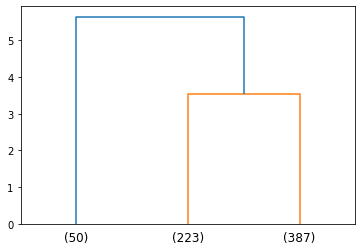



Linkages average


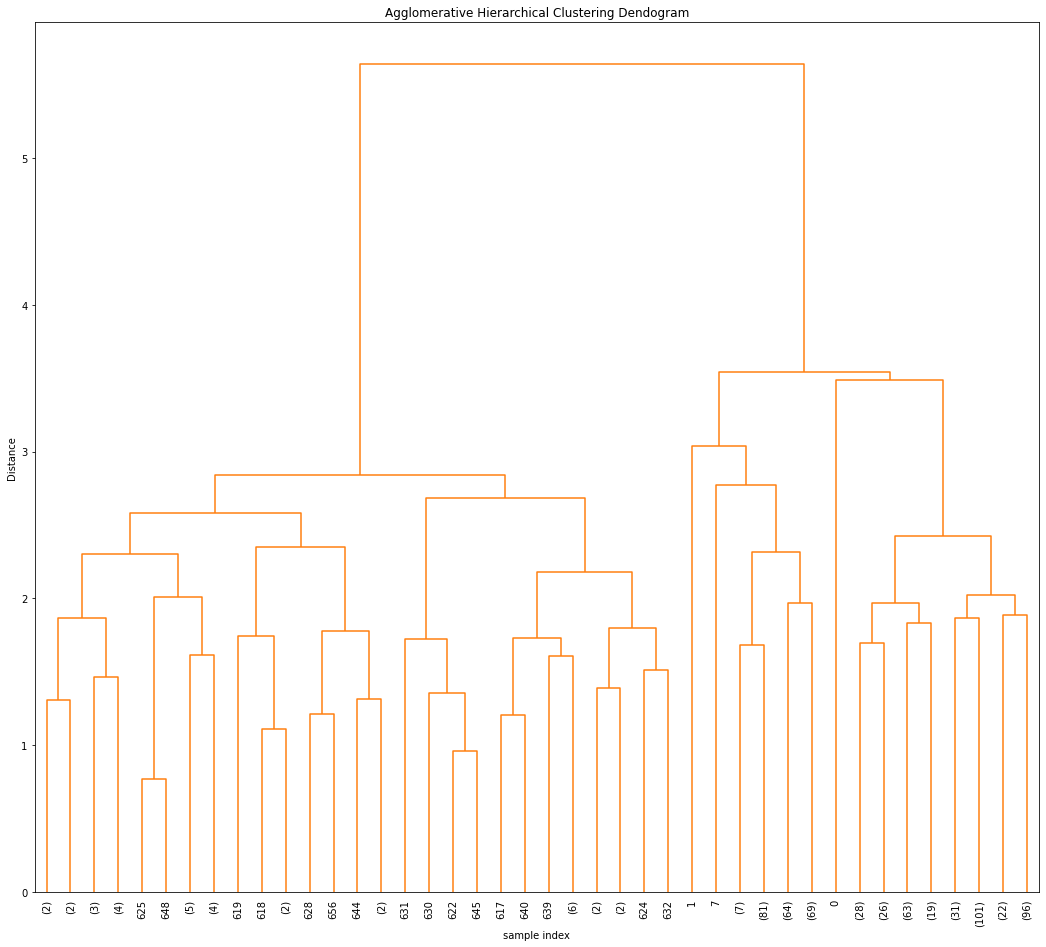

------------------------------------------------------------


C Values for complete = 0.8333358686900459
Plot the dendrogram for the consolidated dataframe


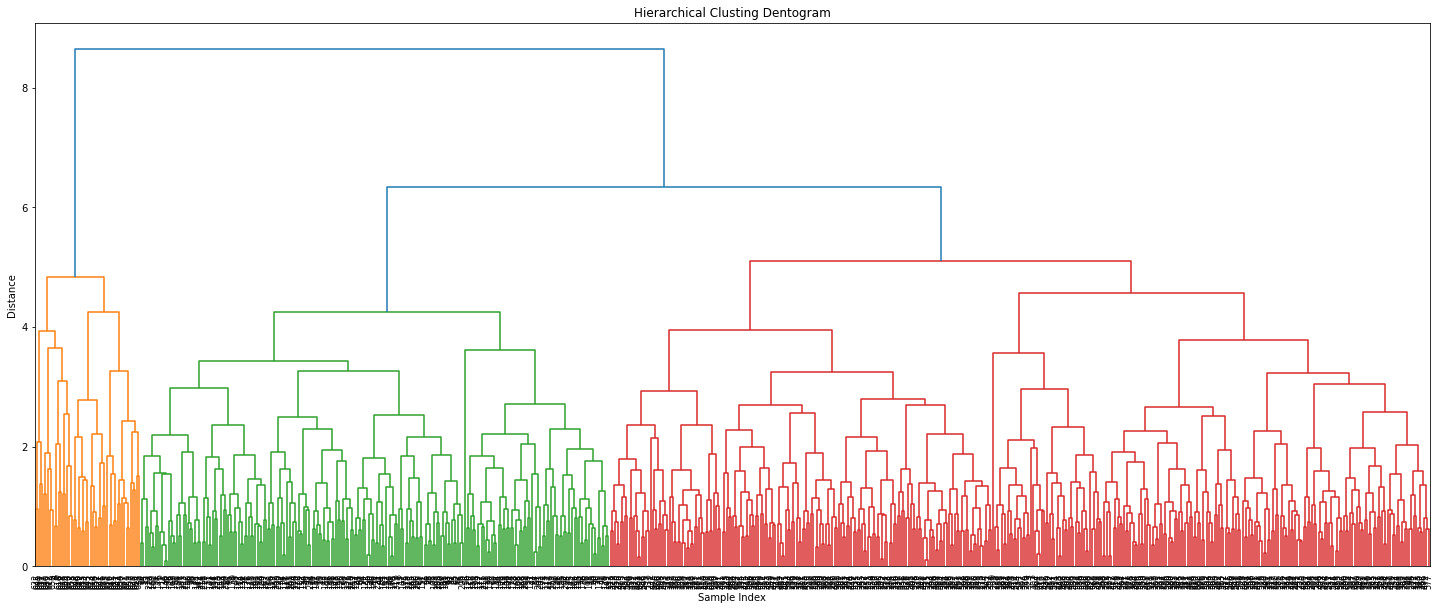

From the truncated dendrogram, find out the optimal distance between clusters


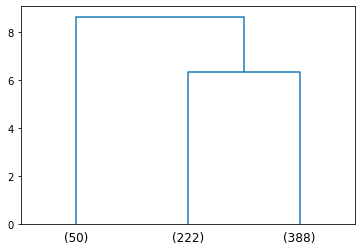



Linkages complete


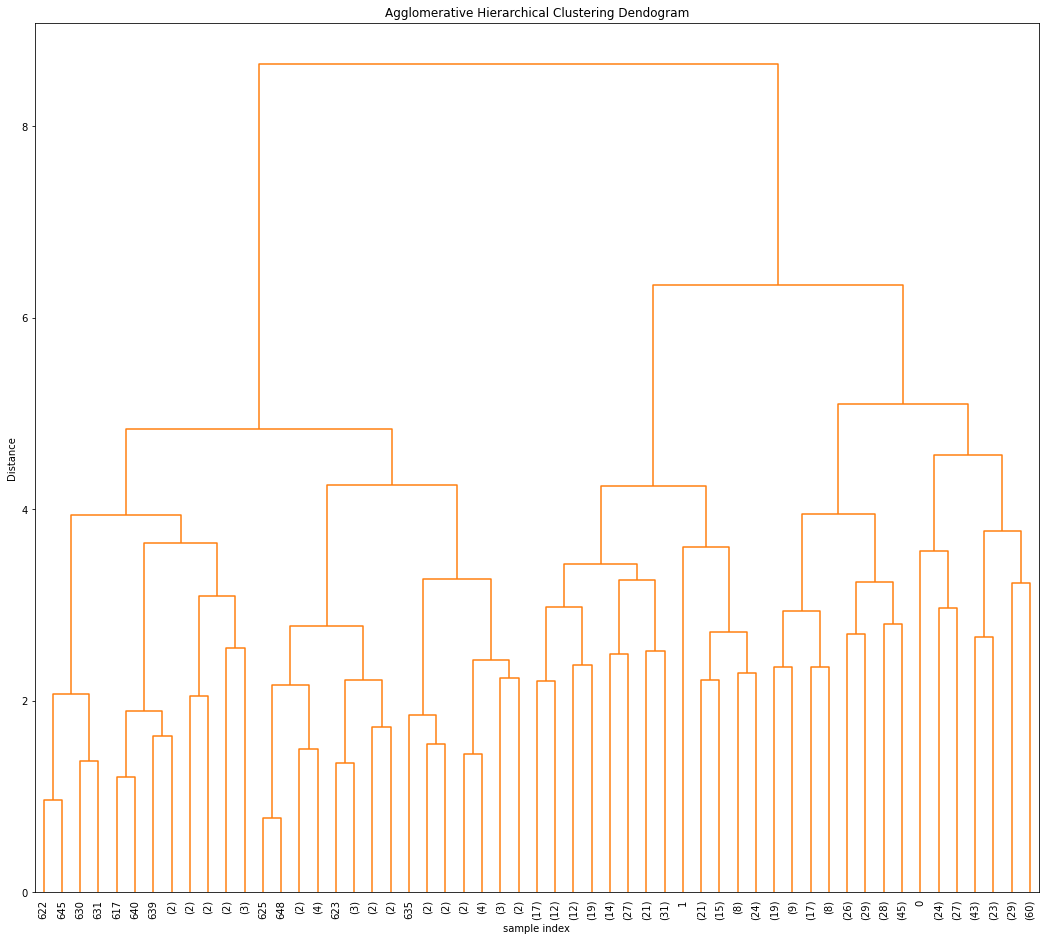

------------------------------------------------------------


C Values for single = 0.715826147503084
Plot the dendrogram for the consolidated dataframe


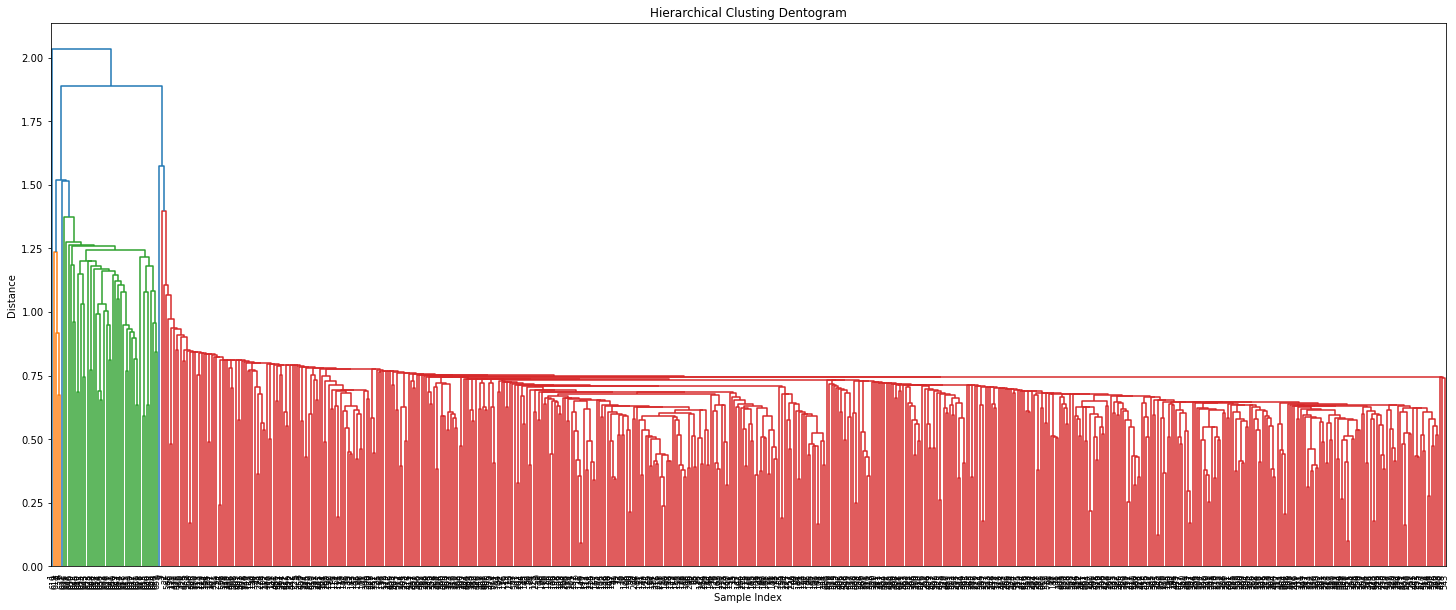

From the truncated dendrogram, find out the optimal distance between clusters


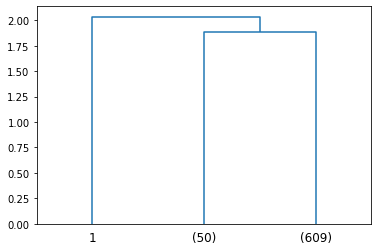



Linkages single


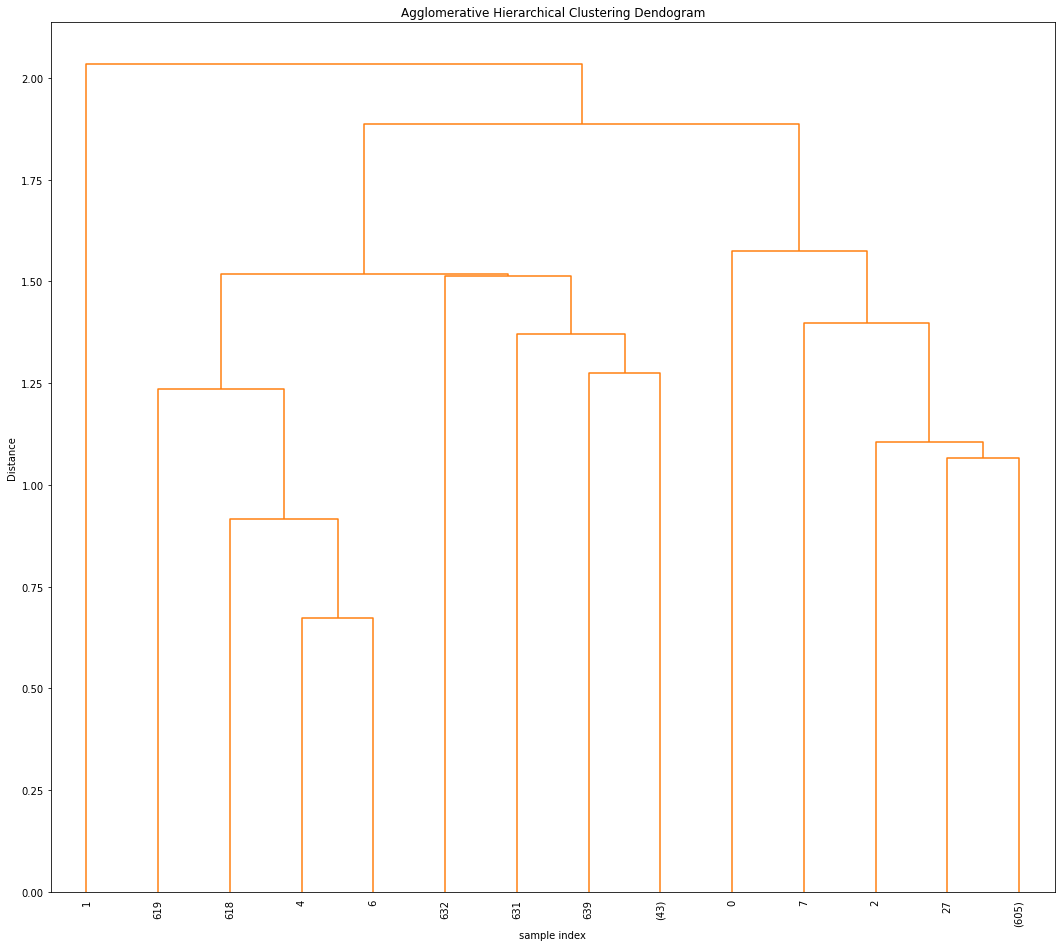

------------------------------------------------------------




In [64]:
# Call the function

hierClus()

##### Observations

* finding out the each linkage method and find out the z & c score gor each linkage and plot the dendrogram.
* Best C values for **average = 0.8684228720933057**

In [65]:
df_labeledHier['labels_Hier']

0      0
1      2
2      0
3      0
4      1
      ..
655    1
656    1
657    1
658    1
659    1
Name: labels_Hier, Length: 660, dtype: int64

In [66]:
# out of linkage above to use average method to build a best model.

Z = linkage(dfCreditScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z, pdist(dfCreditScaled))
c

0.8684228720933057

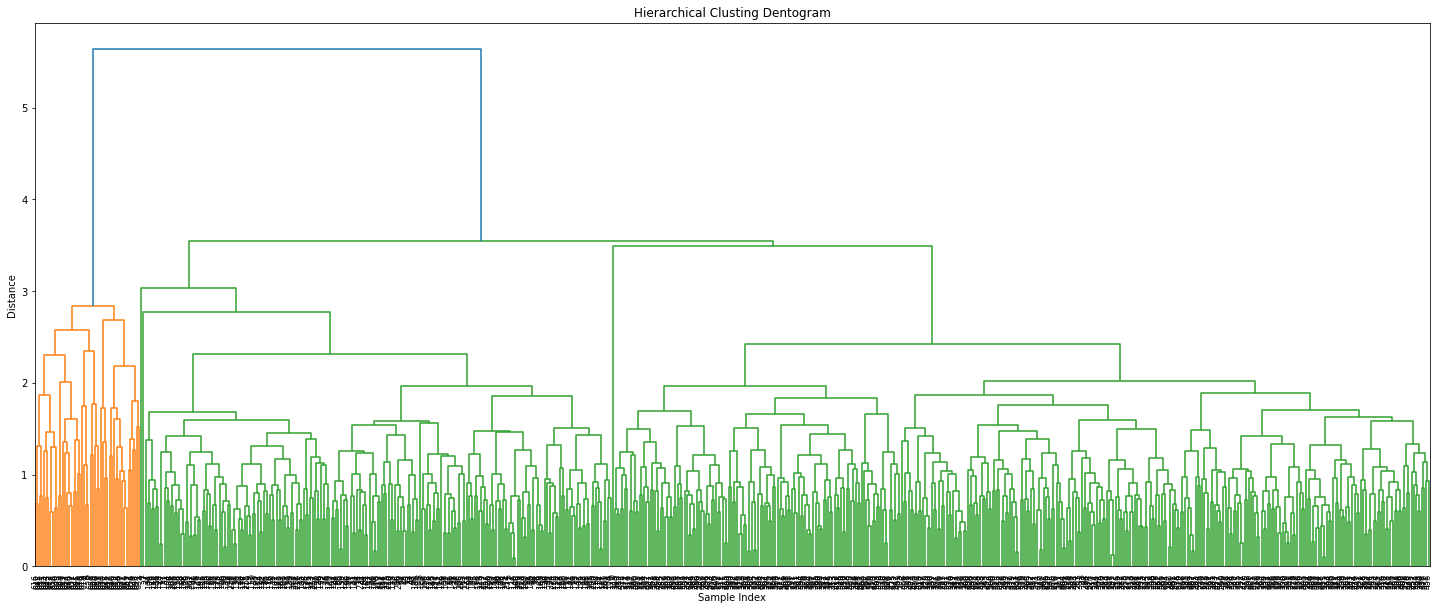

In [67]:
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clusting Dentogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

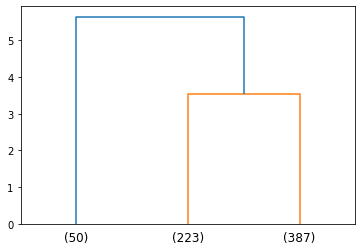

In [68]:
dendrogram(Z, truncate_mode='lastp', p=3)
plt.show()

In [69]:
# max depth to cut the dendrogram

max_d=3.5

In [70]:
# choosing the 3 cluster.

from scipy.cluster.hierarchy import fcluster
clusterss = fcluster(Z, max_d, criterion='distance')
clusterss

array([3, 2, 3, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [71]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
silhouette_score(dfCreditScaled,clusterss)

0.41787233963503095

##### PCA

* Lets convert our data to only 2D using PCA.

In [72]:
covMatrix = np.cov(df_labeledHier,rowvar=False)
print(covMatrix)

[[ 8.63806502e-01  7.58476802e-03 -1.88680489e-01 -5.78069505e-01
  -6.96015295e-01  4.33687330e-01  7.13725654e-01]
 [ 7.58476802e-03  1.00151745e+00  6.87085076e-02 -1.02961020e-02
  -5.60374991e-04  2.25403765e-02  5.97740222e-03]
 [-1.88680489e-01  6.87085076e-02  1.00151745e+00  6.09784409e-01
  -1.00464529e-01  5.52221223e-01 -4.14980652e-01]
 [-5.78069505e-01 -1.02961020e-02  6.09784409e-01  1.00151745e+00
   3.16275257e-01  1.68012865e-01 -6.52239740e-01]
 [-6.96015295e-01 -5.60374991e-04 -1.00464529e-01  3.16275257e-01
   1.00151745e+00 -5.52698824e-01 -5.06783706e-01]
 [ 4.33687330e-01  2.25403765e-02  5.52221223e-01  1.68012865e-01
  -5.52698824e-01  1.00151745e+00  1.27492554e-01]
 [ 7.13725654e-01  5.97740222e-03 -4.14980652e-01 -6.52239740e-01
  -5.06783706e-01  1.27492554e-01  1.00151745e+00]]


In [73]:
pca = PCA(n_components=6)
pca.fit(df_labeledHier)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

##### The Eigen Values

In [74]:
print(pca.explained_variance_)

[2.92948877 2.00591788 1.00250601 0.3218056  0.28097889 0.2465695 ]


#### The Eigen Vectors

In [75]:
print(pca.components_)

[[ 5.06984854e-01 -3.52241582e-04 -2.36519099e-01 -4.57734586e-01
  -4.28510012e-01  1.63428412e-01  5.16889081e-01]
 [ 1.44677246e-01  5.17093366e-02  5.86844993e-01  3.20061558e-01
  -3.59602228e-01  6.26758039e-01 -8.61904275e-02]
 [ 6.97981065e-03 -9.96191064e-01 -2.02812028e-02  5.39365935e-02
  -4.35176892e-02  4.44202266e-02 -1.91629089e-02]
 [-6.76234525e-02  1.06467213e-02  1.35362946e-02 -2.77950576e-01
  -6.58410552e-01 -3.18840367e-01 -6.18635861e-01]
 [-1.28963544e-01  3.70690045e-02 -1.92113135e-01  6.83671717e-01
  -4.59532753e-01 -3.54596063e-01  3.75194752e-01]
 [ 1.27858453e-01  5.85995868e-02 -7.38803007e-01  2.62673416e-01
  -5.02414760e-03  4.67734404e-01 -3.82871235e-01]]


And the percentage of variation explained by each eigen Vector

In [76]:
print(pca.explained_variance_ratio_)

[0.42623696 0.29185855 0.14586337 0.04682231 0.04088208 0.03587555]


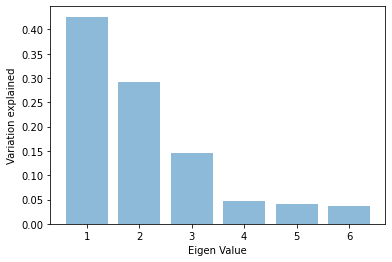

In [77]:
# Plot the bar chart to check the Eigen Value.

plt.bar(list(range(1,7)), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.show()

##### Observations

* see the above plt and its very big drop on eigen value on **3**.
* we will choose 3 is the best value for PCA.

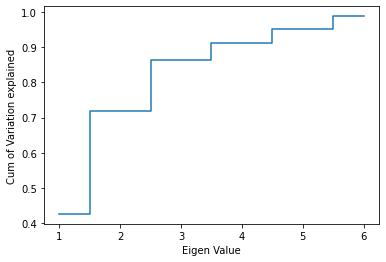

In [78]:
plt.step(list(range(1,7)), np.cumsum(pca.explained_variance_ratio_),where='mid')
plt.ylabel('Cum of Variation explained')
plt.xlabel('Eigen Value')
plt.show()

#### Dimensionality Reduction

* Now 3 dimensions seems very reasonable. With 3 variables 
* we can explain over 95% of the variation in the original data!

In [79]:
pca3 = PCA(n_components=3)
pca3.fit(df_labeledHier)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(df_labeledHier)

[[ 5.06984854e-01 -3.52241582e-04 -2.36519099e-01 -4.57734586e-01
  -4.28510012e-01  1.63428412e-01  5.16889081e-01]
 [ 1.44677246e-01  5.17093366e-02  5.86844993e-01  3.20061558e-01
  -3.59602228e-01  6.26758039e-01 -8.61904275e-02]
 [ 6.97981065e-03 -9.96191064e-01 -2.02812028e-02  5.39365935e-02
  -4.35176892e-02  4.44202266e-02 -1.91629089e-02]]
[0.42623696 0.29185855 0.14586337]


In [80]:
Xpca3

array([[-0.58888973,  0.6512883 , -1.31297941],
       [ 2.91796984,  2.08220511,  0.74846987],
       [-0.49637745,  0.77570372,  1.55464805],
       ...,
       [-1.00616847,  3.99690433,  0.22659878],
       [-1.44527417,  6.08004304, -0.68398451],
       [-0.74577701,  5.37258985, -0.71866616]])

In [81]:
Xpca3.shape

(660, 3)

In [82]:
x,y = Xpca3[:,0], Xpca3[:,1]

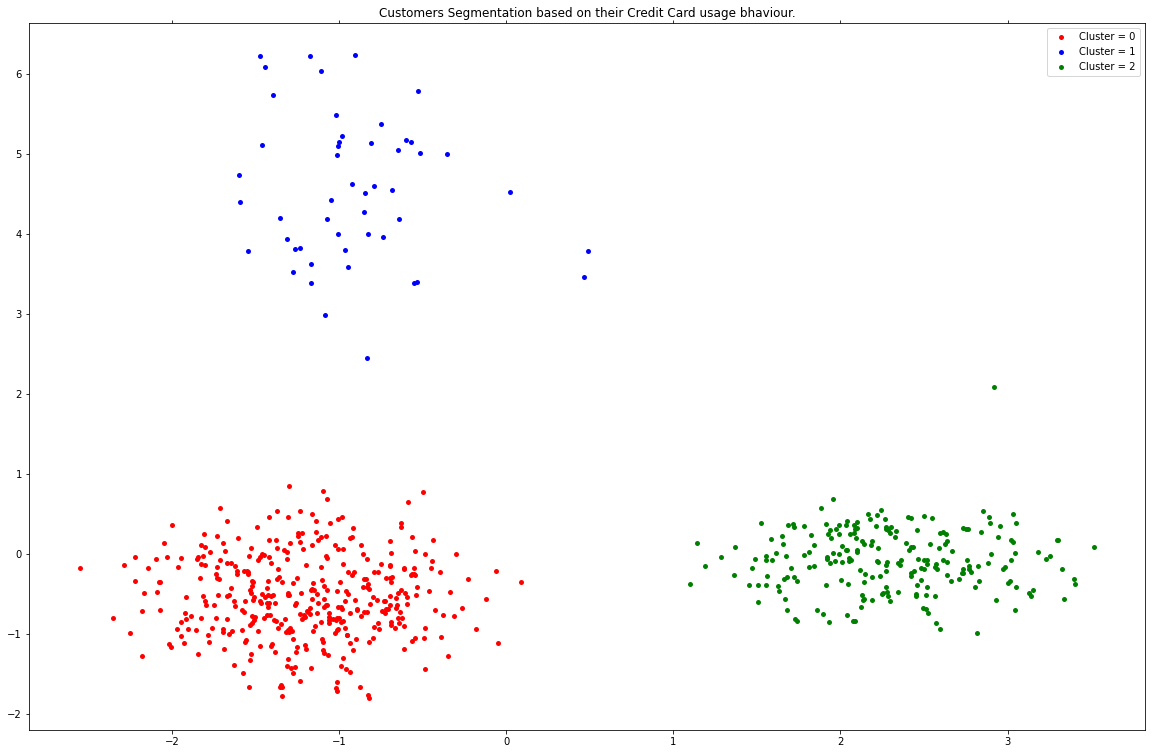

In [83]:
colors = {0: 'red',
          1: 'blue',
          2: 'green'}

names = {0: 'Cluster = 0', 
         1: 'Cluster = 1', 
         2: 'Cluster = 2'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':hiera_labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

In [84]:
df.head()

,x,y,label
0,-0.588890,0.651288,0
1,2.917970,2.082205,2
2,-0.496377,0.775704,0
3,-0.059683,-0.212535,0
4,0.490621,3.787380,1


In [85]:
groups.head()

,x,y,label
0,-0.588890,0.651288,0
1,2.917970,2.082205,2
2,-0.496377,0.775704,0
3,-0.059683,-0.212535,0
4,0.490621,3.787380,1
5,2.424487,-0.238026,2
6,0.465674,3.457959,1
7,1.192511,-0.148272,2
8,1.702351,-0.177465,2
9,2.139783,-0.353515,2


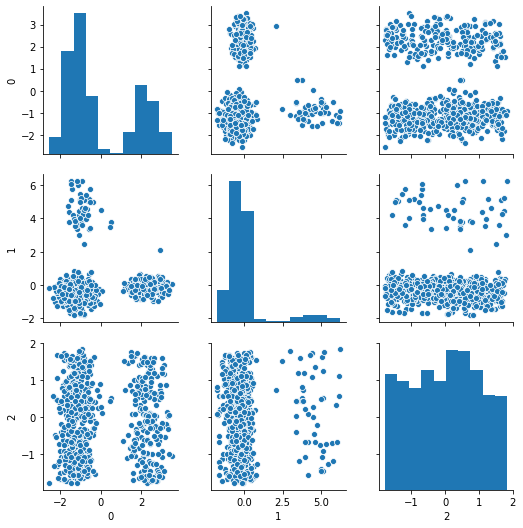

In [86]:
sns.pairplot(pd.DataFrame(Xpca3))
plt.show()

#### Conclusion for Hierarchical Cluster

* Cluster 0 : Most of the Customers (387) out of (660) are **utilize** the most of the services in bank.
* Cluster 1 : Reamining customers  (223) out of (660) are using **more** - total credit cards and visit online services.
* Cluster 2 : Remaining Customers (50) out of (660) are using **more** total - calls are made.

#### BarPlot for KMean Cluster

In [87]:
dfCredit_KMean = df_labels.join(dfCredit)
dfCredit_KMean.head()

,labels,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0,87073,100000,2,1,1,0
1,1,38414,50000,3,0,10,9
2,0,17341,50000,7,1,3,4
3,0,40496,30000,5,1,1,4
4,2,47437,100000,6,0,12,3


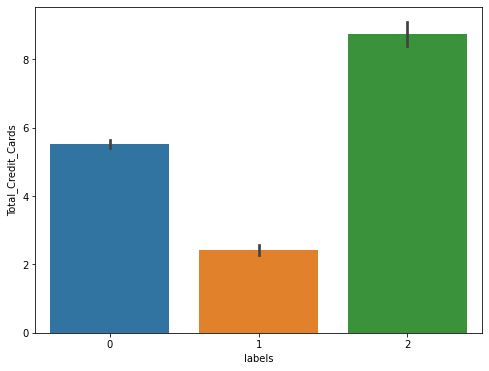

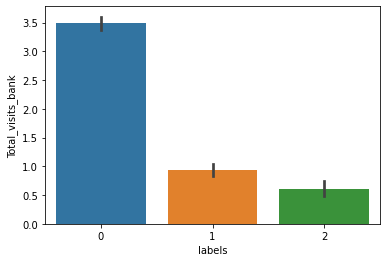

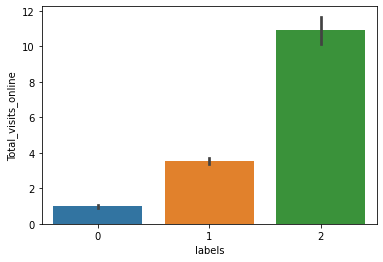

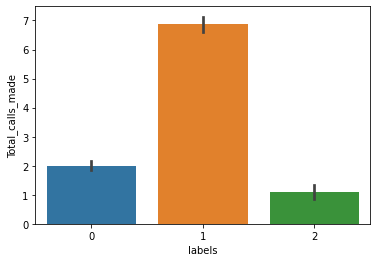

In [88]:
# barplot to check the each clusters 

plt.figure(figsize=(8,6))

for i in ['Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']:
    sns.barplot(x=dfCredit_KMean['labels'],y=dfCredit_KMean[i])
    plt.show()

#### Observations

* Cluster 0 : Most of the Customers (386) out of (660) are using more the total - credit card & visitng the bank.
* Cluster 1 : Reamining customers (224) out of (660) are using more - total calls are made and less customers are using visit online services.
* Cluster 2 : Remaining Customers (50) out of (660) are using total - credit cards and visits online service.

#### BarPlot for Hierarchical Cluster

In [89]:
dfCredit_HierC = df_labelsH.join(dfCredit)
dfCredit_HierC.head()

,labels_Hier,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,0,17341,50000,7,1,3,4
3,0,40496,30000,5,1,1,4
4,1,47437,100000,6,0,12,3


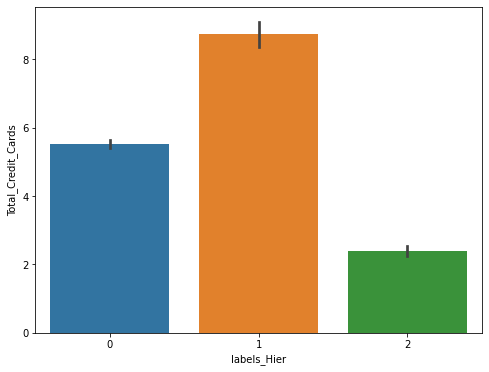

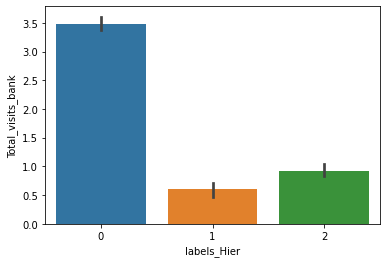

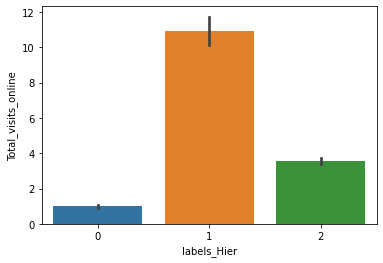

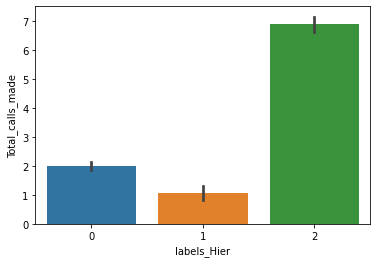

In [90]:
plt.figure(figsize=(8,6))

for i in ['Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']:
    sns.barplot(x=dfCredit_HierC['labels_Hier'],y=dfCredit_HierC[i])
    plt.show()

#### Observations

* Cluster 0 : Most of the Customers (387) out of (660) are **utilize** the most of the Credi card and visting the bank.
* Cluster 1 : Reamining customers  (223) out of (660) are using **more** - total credit cards and visit online services.
* Cluster 2 : Remaining Customers (50) out of (660) are using **more** total - calls are made and other services are using very less.

##### Conclusion

* we will use *cluster = 3* and target most of the customer to use all the facility to the bank.
* because they are using very less services such as visitng online, bank and make calls.